<font size="+3"><b>Final Project: PCA and Clustering
</b></font>

***
* **Full Name** = Alessandro Baldassarre
* **UCID** = 30163507
***

<font color='Blue'>
The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.
</font>

<font color='Red'>
For this assignment, in addition to your .ipynb file, please also attach a PDF file. To generate this PDF file, you can use the print function (located under the "File" within Jupyter Notebook). Name this file ENGG444_Final_Project_yourUCID.pdf (this name is similar to your main .ipynb file). We will evaluate your assignment based on the two files and you need to provide both.
</font>


|                 **Question**                | **Point(s)** |
|:-------------------------------------------:|:------------:|
| **1. Principle Component   Analysis (PCA)** |              |
|                     1.1                     |       3      |
|                     1.2                     |       2      |
|                     1.3                     |       2      |
|                     1.4                     |       3      |
|                     1.5                     |       6      |
|                     1.6                     |       2      |
|         **2. Pipeline and Modeling**        |              |
|                     2.1                     |       3      |
|                     2.2                     |       2      |
|                     2.3                     |       2      |
|                     2.4                     |       3      |
|            **3. Bonus Question**            |     **2**    |
|                    Total                    |      28      |

## Data

The data on [this page](https://archive.ics.uci.edu/dataset/236/seeds) pertains to a study on wheat kernels, specifically focusing on the geometrical properties of kernels from three different wheat varieties: Kama, Rosa, and Canadian. Here's a summary of the key points:

- **Dataset Characteristics**: The data is multivariate and real-valued, used for classification and clustering tasks in biology.
- **Measurement Technique**: A soft X-ray technique was employed for high-quality visualization of the internal kernel structure, which is non-destructive and cost-effective compared to other methods.
- **Geometric Parameters**: Seven parameters were measured for each kernel: area (A), perimeter (P), compactness (C = 4*pi*A/P^2), length, width, asymmetry coefficient, and length of kernel groove.
- **Research Purpose**: The dataset facilitates the analysis of features in X-ray images of wheat kernels and can be applied to various statistical and machine learning tasks.

This dataset was collected for an experiment conducted at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin and has been cited in several research papers for its application in feature analysis and classification algorithms.

In [67]:
# Download the zip file using wget
!wget -N "https://archive.ics.uci.edu/static/public/236/seeds.zip"

# Unzip wine.data from the downloaded zip file
!unzip -o seeds.zip seeds_dataset.txt

# Remove the downloaded zip file after extraction
!rm -r seeds.zip

--2024-04-09 23:46:59--  https://archive.ics.uci.edu/static/public/236/seeds.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘seeds.zip’

seeds.zip               [ <=>                ]   9.21K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2024-04-09 23:47:00 (133 MB/s) - ‘seeds.zip’ saved [9432]

Archive:  seeds.zip
 extracting: seeds_dataset.txt       


In [68]:
# 1. area A,
# 2. perimeter P,
# 3. compactness C = 4*pi*A/P^2,
# 4. length of kernel,
# 5. width of kernel,
# 6. asymmetry coefficient
# 7. length of kernel groove.

# https://archive.ics.uci.edu/dataset/236/seeds

import pandas as pd

data = pd.read_csv('seeds_dataset.txt', sep = '\s+', header = None)
data.columns = ['Area', 'Perimeter', 'Compactness',
                'Length of Kernel', 'Width of Kernel',
                'Asymmetry Coefficient', 'Length of Kernel Groove', 'Type']
display(data)

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


## 1. Principle Component Analysis (PCA)

### 1.1 Preprocessing (3 Points)

- **Split the data into X and y** (0.5 Point)
  - Assign the features to `X` and the target variable to `y`.

- **Stratified Split of X and y into Train and Test Sets** (0.5 Point)
  - Utilize stratification to ensure representative distribution of classes while splitting.

- **Plot Train and Test Proportions in a Pie Chart** (2 Points)
  - The pie chart should include:
    - Labels indicating 'Training Set' and 'Test Set'.
    - A title for the chart.
    - Proportion percentages for the Training and Test sets displayed on each slice of the pie.
    - The number of entries within the Training and Test sets shown below the corresponding percentage.

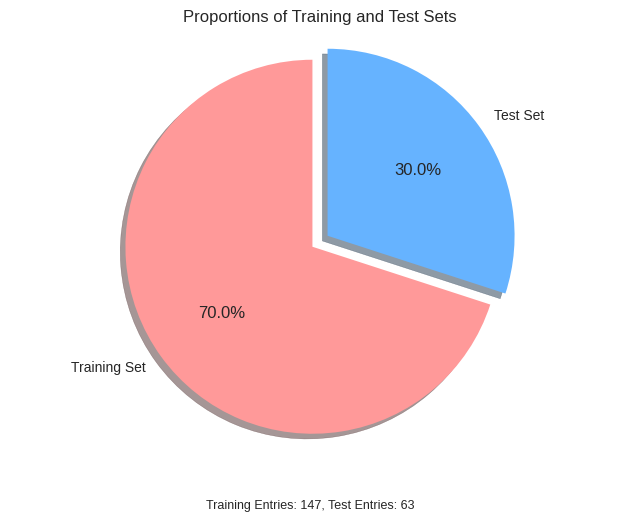

In [69]:
# 1.1
# Add necessary code here.
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Splitting data into X and y
X = data.drop('Type', axis=1)
y = data['Type']

# Stratified Split of X and y into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Plot Train and Test Proportions in a Pie Chart
sizes = [len(y_train), len(y_test)]
labels = ['Training Set', 'Test Set']
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt.title('Proportions of Training and Test Sets')

# Display the number of entries below the chart
train_entries = f"Training Entries: {len(y_train)}"
test_entries = f"Test Entries: {len(y_test)}"
plt.figtext(0.5, 0.01, f"{train_entries}, {test_entries}", ha="center", fontsize=9)

plt.show()

<font color='Green'><b>Answer:</b></font>

- **1.1** .....................

### 1.2 Scaling the Data (2 Points)

To ensure that our preprocessing pipeline optimizes the performance of our machine learning model, we need to scale the data appropriately.

- **Selecting an Appropriate Scaler**:
  - Explain your choice of scaler for the dataset. (1 Points)
  - Justify your decision based on the characteristics of the data and the requirements of the algorithm being used. (1 Points)


<font color='Green'><b>Answer:</b></font>

- **1.2** .....................
- Explanation:
  - For this dataset I chose the StandardScaler. This scaler removes the mean and scales the data to unit variance. Thus each feature will contain a mean of 0 and a standard deviation of 1 after scaling.
- Justification:
  - The dataset has features measured in different units and scales such as area, perimeter, and compactness which makes StandardScaler a good choice. Since PCA is influenced by the scale of the features we must normalize the features so that they are on the same scale which will prevent features from disproportionately influencing the PCA outcome.
  - PCA benefits from feature scaling since it aims to capture the variance of the data thus features with larger variances will have a higher weight in the outcome. This might not be desirable so by using StandardScaler we are ensuring that the PCA captures the underlying patterns in the data instead of the patterns influenced by the scale of the measurement.

### 1.3 Model Selection and Justification (2 Points)

- **Choose an Appropriate Machine Learning Model**:
  - Identify the model that you believe is most suitable for the dataset.
  - Provide a justification for your choice based on the dataset's characteristics.

In [70]:
# 1.3
# Add necessary code here.

<font color='Green'><b>Answer:</b></font>

- **1.3** .....................
- Model Choice:
  - Random Forest
- Justification:
  -

### 1.4 Hyperparameter Optimization with Grid Search (3 Points)

- **Set Up the Grid Search**:
  - Construct a pipeline that incorporates the selected scaler from part 1.2 to standardize the data.
  - Execute a grid search within this pipeline to identify the best hyperparameter settings for your chosen model.
  - Provide a broad and varied range of hyperparameter values to ensure a thorough search.


In [71]:
# 1.4
# Add necessary code here.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Creating the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

# Defining the parameter grid
param_grid = {
    'rf__n_estimators': [100, 200, 300, 500],
    'rf__max_depth': [5, 10, 15, 20],
}

# Setting up Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2, n_jobs=-1)

# Fitting Grid Search to the data
grid_search.fit(X_train, y_train)

# Check the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Predict the target values for the test set
y_pred = grid_search.predict(X_test)

# Calculate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'rf__max_depth': 5, 'rf__n_estimators': 500}
Best score: 0.9124137931034483
Accuracy: 0.8889
Recall: 0.8889
Precision: 0.8930
F1 Score: 0.8868


<font color='Green'><b>Answer:</b></font>

- **1.4** .....................

### 1.5 Dimensionality Reduction and Model Optimization (6 Points)

- **Dimensionality Reduction Choice** (2 Points):
  - Choose between PCA and t-SNE for reducing the dataset to two dimensions.
  - Justify your selection based on the characteristics of the seeds dataset.

- **Implement Dimensionality Reduction** (2 Points):
  - Apply the chosen dimensionality reduction technique to the seeds dataset.
  - Reduce the dataset to two dimensions as required.

- **Model Optimization on Reduced Data** (2 Points):
  - Redo the grid search from part 1.4 using the two-dimensional data.
  - Compare the model's performance with the original higher-dimensional data.

In [72]:
# 1.5
# Add necessary code here.
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Apply PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Prepare train-test split on the reduced data
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, stratify=y, random_state=42)

# Define pipeline
pipeline_reduced = Pipeline([('rf', RandomForestClassifier(random_state=42))])

# Define parameter grid
param_grid_reduced = {'rf__n_estimators': [100, 200, 500],
                      'rf__max_depth': [5, 10, 15, 20]}

# Initialize and fit GridSearchCV
grid_search_reduced = GridSearchCV(pipeline_reduced, param_grid_reduced, cv=5, n_jobs=-1, verbose=2)
grid_search_reduced.fit(X_train_reduced, y_train)

# Check the best parameters and the best score
print("Best parameters:", grid_search_reduced.best_params_)
print("Best score:", grid_search_reduced.best_score_)

# Predict the target values for the test set
y_pred_reduced = grid_search_reduced.predict(X_test_reduced)

# Calculate the performance metrics
accuracy = accuracy_score(y_test, y_pred_reduced)
recall = recall_score(y_test, y_pred_reduced, average='macro')
precision = precision_score(y_test, y_pred_reduced, average='macro')
f1 = f1_score(y_test, y_pred_reduced, average='macro')

# Print the performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'rf__max_depth': 5, 'rf__n_estimators': 500}
Best score: 0.912183908045977
Accuracy: 0.8571
Recall: 0.8571
Precision: 0.8595
F1 Score: 0.8512


<font color='Green'><b>Answer:</b></font>

- **1.5** .....................
- I chose PCA because:
  - PCA is simple, efficient, and has the ability to preserve the variance of the original data. Since the seeds dataset is primarily focused on geometrical properties for classification, PCA is more appropriate. PCA can efficiently reduce the dataset to 2D whilst retaining the informative variance. Thus PCA is a good fit for preparing our data for our chosen model, Random Forest Classifier.
- Model Comparison:
  - The model's performance compared to the original higher-dimensional data is about the same with the PCA reduced data having slightly lower scores. This could be due to the first two principal components containing a significant amount of variance in the dataset thus PCA has captured the most important information required for classification. This results in a reduced dataset still being very representative of the original datasets patterns and structure.
  - Random Forest Classifier is also quite robust to variations in input data.


### 1.6 Visualizing Reduced Dimensionality Data (2 Points)

- **Create a 2D Scatter Plot for Training and Testing Sets**:
  - Generate 1-row-two-column subplots for scatter plots for the two-dimensional training and testing data obtained from part 1.5.
  - Clearly label the x-axis and y-axis for both plots.
  - Include a legend in each plot that distinctly represents the distribution of the three classes (you can use different shapes and colors to represent different classes).

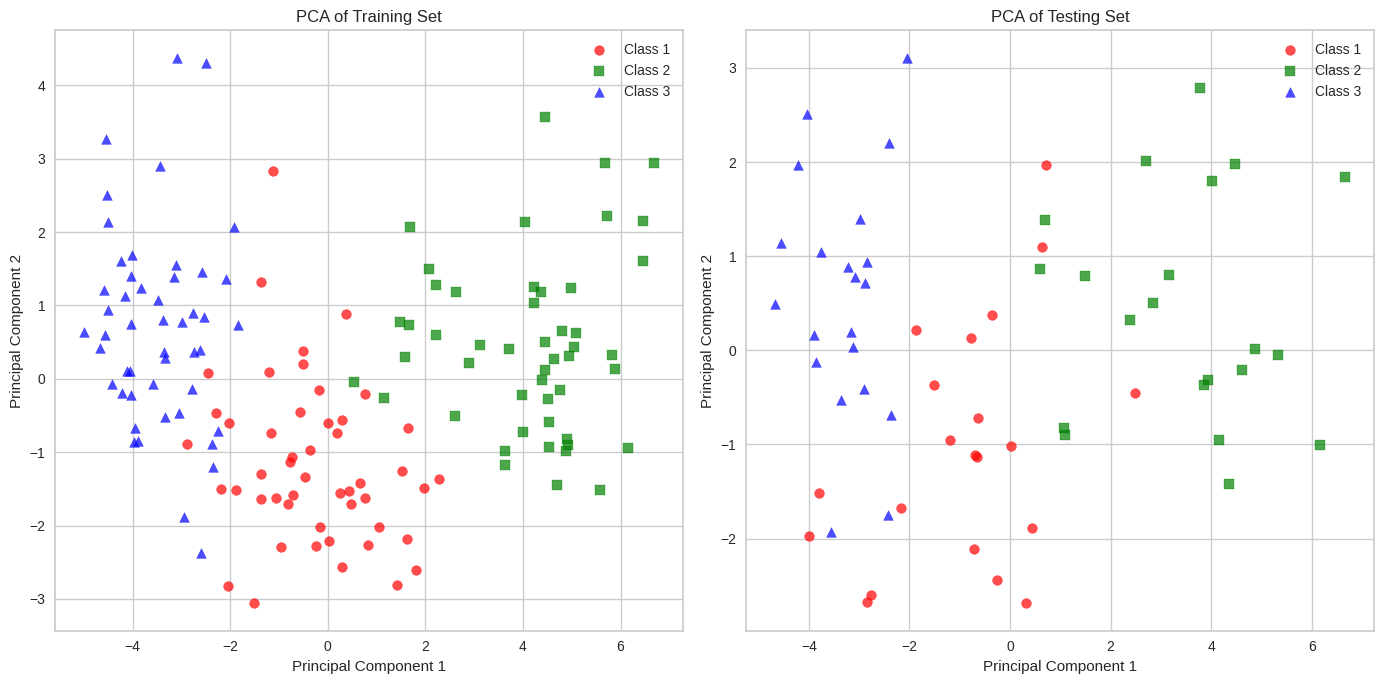

In [73]:
# 1.6
# Add necessary code here.
# Define markers and colors for each class
markers = ['o', 's', '^']
colors = ['red', 'green', 'blue']

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Training set scatter plot
for i, (marker, color) in enumerate(zip(markers, colors), start=1):
    axes[0].scatter(X_train_reduced[y_train == i, 0], X_train_reduced[y_train == i, 1],
                    marker=marker, color=color, alpha=0.7, label=f'Class {i}')

axes[0].set_title('PCA of Training Set')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].legend()

# Testing set scatter plot
for i, (marker, color) in enumerate(zip(markers, colors), start=1):
    axes[1].scatter(X_test_reduced[y_test == i, 0], X_test_reduced[y_test == i, 1],
                    marker=marker, color=color, alpha=0.7, label=f'Class {i}')

axes[1].set_title('PCA of Testing Set')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].legend()

plt.tight_layout()
plt.show()


## 2. Clustering and Visualization of the Seeds Dataset

### 2.1 Create a Pipeline for Scaling and K-Means Clustering (3 Points)

- Construct a pipeline that includes a scaler and the K-Means clustering algorithm.
- Use the `KelbowVisualizer` with `metric='calinski_harabasz'` from Yellowbrick to determine the optimal number of clusters, `k`.
- Explain the results of the `KelbowVisualizer`.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

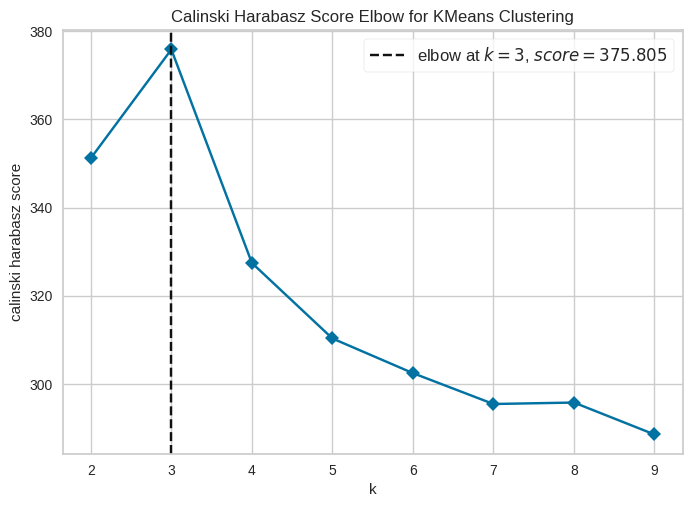

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [74]:
# 2.1
# Add necessary code here.
!pip install yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(random_state=42))
])

# Initialize the KElbowVisualizer with the Calinski-Harabasz score metric
visualizer = KElbowVisualizer(pipeline.named_steps['kmeans'], k=(2,10), metric='calinski_harabasz', timings=False)

# Fit the data to the visualizer
visualizer.fit(X)
visualizer.show()


<font color='Green'><b>Answer:</b></font>

- **2.1** .....................
- Results of KelbowVisualizer:
  - The Calinski-Harabasz score is a measure of cluster validity and the score is higher where clusters are denser and better separated. This relates to a model with better-defined clusters.
  - The plot displays a sharp increase going from k=2 to k=3 which is where the Calinski-Harabasz score is the highest.
  - After k=3 the score begins to decrease and continues to drop as k increases. The rate of decrease slows down after k=3 which is the elbow we are looking for in the plot meaning our optimal k is 3.
  - The elbow at k=3 means that the increasing number of clusters beyond this point do not yield better defined clusters but rather the quality of the clusters would decrease in terms of density and separation.

### 2.2 Label the Data Using the Optimal Number of Clusters (2 Points)
- Label the training data using the pipeline that includes both the scaler and K-Means with the optimal `k` found in part 2.1.

In [75]:
# 2.2
# Add necessary code here.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

optimal_k = 3

# Define the pipeline with the optimal k
pipeline_optimal = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=optimal_k, random_state=42))
])

# Fit the pipeline to the data
pipeline_optimal.fit(X)

# Extract the cluster labels
labels = pipeline_optimal.predict(X)

data['Cluster_Labels'] = labels

data['Cluster_Labels']

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0      2
1      2
2      2
3      2
4      2
      ..
205    1
206    1
207    1
208    1
209    1
Name: Cluster_Labels, Length: 210, dtype: int32

### 2.3 Dimensionality Reduction Using PCA (2 Points)
- Apply PCA to reduce the dimensionality of the dataset to 2D.

In [76]:
# 2.3
# Add necessary code here.
# Applying PCA to reduce the dataset to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# The resulting X_pca is the dataset reduced to 2 dimensions

#### 2.4 Plot the 2D Data with Cluster Labels (3 Points)
- Create a 2D scatter plot of the PCA-reduced data.
- Color the points using the labels obtained from K-Means clustering.

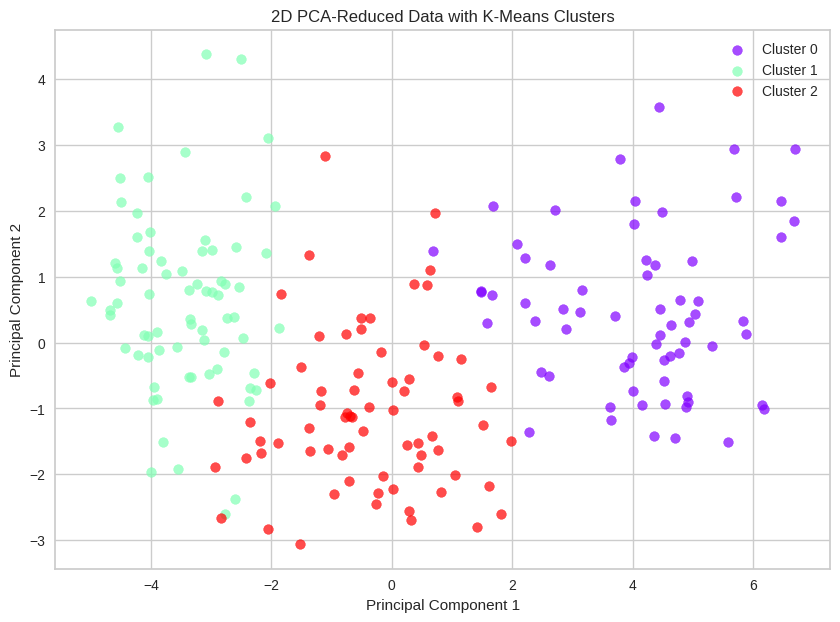

In [77]:
# 2.4
# Add necessary code here.
import numpy as np

plt.figure(figsize=(10, 7))

# Obtain unique labels
unique_labels = np.unique(labels)

# Generate a color palette with the same number of colors as unique labels
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

# Plot each cluster with its own color
for label, color in zip(unique_labels, colors):
    plt.scatter(X_pca[labels == label, 0], X_pca[labels == label, 1],
                color=color, label=f'Cluster {label}', alpha=0.7)

plt.title('2D PCA-Reduced Data with K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


## Bonus Question: Interpretation of Clustering Results (2 Points)

- **Analyze and Interpret the Clustering Outcome**:
  - Based on the 2D PCA plot with K-Means clustering labels from part 2.4, provide an interpretation of the clustering results.
  - Discuss any patterns or insights observed from the plot, considering the distribution and overlap of clusters.

<font color='Green'><b>Answer:</b></font>

- **Bonus Question** .....................

The K-means clustering on the PCA feature space has identified clusters that likely correspond to three different variations of wheat in the dataset. However the overlap suggests that there may be some shared characteristics among certain variations.
  - The clusters appear to be pretty well separated with cluster 0 and cluster 2 completely separated not intersecting at all.
  - There is some overlap of clusters specifically in clusters 1 and 2 which suggests there may still be some complexities or mixed characteristics in the dataset even though PCA effectively reduced the dimensions.
  - Cluster 0 also displays a greater density than the other two clusters which implies that the data points belonging to cluster 0 are more similar to each other in the PCA transformed feature space than those in clusters 1 and 2. This could mean that cluster 0 has more consistent or homogenous features.